# Classification

## mengimport library yang diperlukan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

## membaca data

In [3]:
data = pd.read_excel("3SI1_Dataset 03_Gejala Ikutan Vaksin.xlsx")
data

,Sex,Age,Professions,Education,Living Area,1. Swelling,2. Redness,3. Itching,4. Fever,5. Headache,...,8. Coughing,9. Diarrhea,10. Nausea and vomiting,11. Breathlessness,12. Joint Pain,13. Fainted,14. Anaphylactic Reaction,15. Tingling,16. Swollen Lymph Nodes,TARGET LABEL (SYMPTOM TIME)
0,Male,51-55 years,Medical specialist,Master degree,Downtown,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,None
1,Female,41-45 years,Non medical staff,Master degree,Downtown,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,None
2,Male,56-60 years,Medical doctor,NaN,Downtown,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,< 24 hours
3,Male,26-30 years,Non medical staff,NaN,Downtown,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,None
4,Female,31-35 years,Medical doctor,Bachelor degree,Downtown,No,No,No,No,No,...,Yes,No,No,No,No,No,No,No,No,< 24 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,Female,36-40 years,Midwife,Bachelor degree,Downtown,Yes,No,No,No,No,...,No,No,No,No,No,No,No,No,No,24-72 hours
445,Female,46-50 years,Non medical staff,Bachelor degree,Outskirt,No,No,No,No,Yes,...,Yes,No,No,No,No,No,No,No,No,24-72 hours
446,Female,36-40 years,Nurse,Bachelor degree,Downtown,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,None
447,Female,41-45 years,Non medical staff,Bachelor degree,Downtown,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,24-72 hours


In [4]:
data.head()

,Sex,Age,Professions,Education,Living Area,1. Swelling,2. Redness,3. Itching,4. Fever,5. Headache,...,8. Coughing,9. Diarrhea,10. Nausea and vomiting,11. Breathlessness,12. Joint Pain,13. Fainted,14. Anaphylactic Reaction,15. Tingling,16. Swollen Lymph Nodes,TARGET LABEL (SYMPTOM TIME)
0,Male,51-55 years,Medical specialist,Master degree,Downtown,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,None
1,Female,41-45 years,Non medical staff,Master degree,Downtown,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,None
2,Male,56-60 years,Medical doctor,NaN,Downtown,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,< 24 hours
3,Male,26-30 years,Non medical staff,NaN,Downtown,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,None
4,Female,31-35 years,Medical doctor,Bachelor degree,Downtown,No,No,No,No,No,...,Yes,No,No,No,No,No,No,No,No,< 24 hours


In [5]:
data.keys()

Index(['Sex', 'Age', 'Professions', 'Education', 'Living Area', '1. Swelling',
       '2. Redness', '3. Itching', '4. Fever', '5. Headache', '6. Muscle Pain',
       '7. Tiredness', '8. Coughing', '9. Diarrhea', '10. Nausea and vomiting',
       '11. Breathlessness', '12. Joint Pain', '13. Fainted',
       '14. Anaphylactic Reaction', '15. Tingling', '16. Swollen Lymph Nodes',
       'TARGET LABEL (SYMPTOM TIME)'],
      dtype='object')

In [6]:
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sex                          449 non-null    object
 1   Age                          449 non-null    object
 2   Professions                  449 non-null    object
 3   Education                    447 non-null    object
 4   Living Area                  449 non-null    object
 5   1. Swelling                  448 non-null    object
 6   2. Redness                   448 non-null    object
 7   3. Itching                   449 non-null    object
 8   4. Fever                     449 non-null    object
 9   5. Headache                  449 non-null    object
 10  6. Muscle Pain               448 non-null    object
 11  7. Tiredness                 448 non-null    object
 12  8. Coughing                  449 non-null    object
 13  9. Diarrhea                  449 no

## EDA

### Statistika deskriptif

In [7]:
df.describe()

,Sex,Age,Professions,Education,Living Area,1. Swelling,2. Redness,3. Itching,4. Fever,5. Headache,...,8. Coughing,9. Diarrhea,10. Nausea and vomiting,11. Breathlessness,12. Joint Pain,13. Fainted,14. Anaphylactic Reaction,15. Tingling,16. Swollen Lymph Nodes,TARGET LABEL (SYMPTOM TIME)
count,449,449,449,447,449,448,448,449,449,449,...,449,449,449,449,449,449,449,447,449,449
unique,2,10,5,4,2,2,2,1,2,2,...,2,2,2,2,2,1,2,2,2,4
top,Female,26-30 years,Nurse,Bachelor degree,Downtown,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,None
freq,326,105,227,345,305,400,438,449,439,329,...,405,433,437,441,442,449,447,408,446,184


### Pengecekan missing value

In [8]:
df.isnull().sum()

Sex                            0
Age                            0
Professions                    0
Education                      2
Living Area                    0
1. Swelling                    1
2. Redness                     1
3. Itching                     0
4. Fever                       0
5. Headache                    0
6. Muscle Pain                 1
7. Tiredness                   1
8. Coughing                    0
9. Diarrhea                    0
10. Nausea and vomiting        0
11. Breathlessness             0
12. Joint Pain                 0
13. Fainted                    0
14. Anaphylactic Reaction      0
15. Tingling                   2
16. Swollen Lymph Nodes        0
TARGET LABEL (SYMPTOM TIME)    0
dtype: int64

### Cek imbalance

<AxesSubplot:xlabel='TARGET LABEL (SYMPTOM TIME)', ylabel='count'>

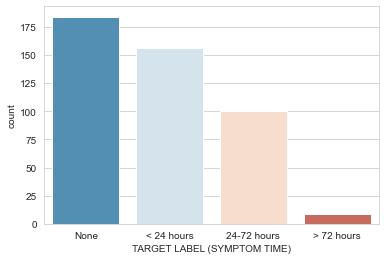

In [10]:
sns.set_style('whitegrid')
sns.countplot(x=df['TARGET LABEL (SYMPTOM TIME)'],data=df,palette='RdBu_r')

**Pemeriksaan korelasi antar variabel kuantitatif**

In [11]:
df['TARGET LABEL (SYMPTOM TIME)'].unique()

array(['None', '< 24 hours', '24-72 hours', '> 72 hours'], dtype=object)

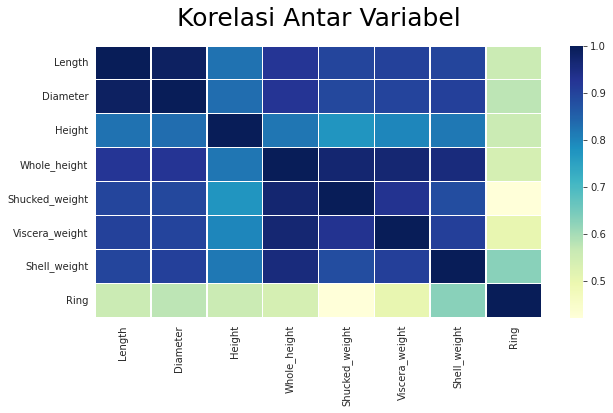

In [ ]:
df_corr = df.drop('Sex', axis=1).corr()
label = ['Length', 'Diameter', 'Height', 'Whole_height', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Ring']
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df_corr, cmap='YlGnBu', linewidths=0.3, xticklabels=label, yticklabels=label)
plt.title('Korelasi Antar Variabel', loc='center', pad=20, fontsize=25, color='black')
labels, locations = plt.yticks()

In [12]:
sns.set_style('whitegrid')
sns.pairplot(df,hue='TARGET LABEL (SYMPTOM TIME)', height=1)
plt.show()

ValueError: No variables found for grid columns.

In [13]:
l=list(df.columns[0:10])
for i in range(len(l)-1):
    sns.boxplot(x='TARGET LABEL (SYMPTOM TIME)',y=l[i], data=df, palette='winter')
    plt.figure()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

## Pembangunan Model

### Splitting data

In [14]:
# Kita akan membuat 2 DataFrame:  
# df_feat yang khusus hanya akan berisi nilai-nilai atribut/fitur/variabel saja.
# dan 
# df_target yang khusus hanya akan berisi label/kelas/target 
df_feat = df.drop('Ring',axis=1) 
df_feat.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120


In [15]:
df_feat.loc[(df_feat.Sex == 'M'), 'Sex'] = 0
df_feat.loc[(df_feat.Sex == 'F'), 'Sex'] = 1
df_feat.loc[(df_feat.Sex == 'I'), 'Sex'] = 2

In [16]:
df_feat['Sex'].astype('int')

0       0
1       1
2       0
3       2
4       2
       ..
4171    1
4172    0
4173    0
4174    1
4175    0
Name: Sex, Length: 4176, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4176 non-null   object 
 1   Length          4176 non-null   float64
 2   Diameter        4176 non-null   float64
 3   Height          4176 non-null   float64
 4   Whole_weight    4176 non-null   float64
 5   Shucked_weight  4176 non-null   float64
 6   Viscera_weight  4176 non-null   float64
 7   Shell_weight    4176 non-null   float64
 8   Ring            4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


### Transformasi min max scaler

In [18]:
from sklearn.preprocessing import MinMaxScaler  
#Define MinMaxScaler as scaler  
scaler = MinMaxScaler()  
columns = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']
df_feat[columns] = scaler.fit_transform(df_feat[columns])

df_feat[columns] = pd.DataFrame(df_feat[columns])
print(df_feat[columns].describe().T[['min','max']])

                min  max
Length          0.0  1.0
Diameter        0.0  1.0
Height          0.0  1.0
Whole_weight    0.0  1.0
Shucked_weight  0.0  1.0
Viscera_weight  0.0  1.0
Shell_weight    0.0  1.0


In [19]:
# df_target yang khusus hanya akan berisi label/kelas/target, yaitu apakah positif kanker ganas atau tidak
df_target = df['Ring'] 
df_target.head()

0     7
1     9
2    10
3     7
4     8
Name: Ring, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# Proporsi yang digunakan adalah 70% untuk training dan 30% untuk testing secara acak.
# Karena pembagian dilakukan secara acak, maka, kita tambahkan parameter random_state agar pengacakan ini bisa direplikasi kemudian hari
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target, test_size=0.30, random_state=123)

X_train: atribut-atribut data latih

X_test: atribut-atribut data uji

y_train: label/kelas data latih

y_test: label/kelas data uji

In [22]:
y_train.head()

3524     6
112      9
2979     7
1715    12
3548     9
Name: Ring, dtype: int64

## Training Model

### Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
model = RandomForestClassifier(random_state=123)

In [25]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

**Prediksi dan evaluasi model**

In [26]:
from sklearn.datasets import make_classification

predictions = model.predict(X_test)

In [27]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


**Menampilkan confusion matrix**

In [28]:
cm = confusion_matrix(y_test, predictions, labels=df_target)
cm

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 66, 52,  6],
       [ 0,  0,  0, ..., 47, 56,  7],
       [ 0,  0,  0, ..., 12, 25,  7]])

**menghitung accuracy, presisi, recall dan f1 score**

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.25      0.50      0.33         4
           4       0.27      0.14      0.19        21
           5       0.35      0.33      0.34        33
           6       0.26      0.25      0.25        72
           7       0.28      0.38      0.32       115
           8       0.29      0.31      0.30       170
           9       0.28      0.30      0.29       221
          10       0.23      0.29      0.26       193
          11       0.23      0.26      0.25       142
          12       0.14      0.09      0.11        81
          13       0.06      0.05      0.05        59
          14       0.05      0.03      0.04        33
          15       0.06      0.03      0.04        35
          16       0.00      0.00      0.00        23
          17       0.00      0.00      0.00        20
          18       0.00      0.00      0.00         9
          19       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Adaboost 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
model.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=50, random_state=None)

**Prediksi dan evaluasi model**

In [ ]:
from sklearn.datasets import make_classification

predictions = model.predict(X_test)

**confusion matrix**

In [ ]:
cm = confusion_matrix(y_test, predictions, labels=df_target)
cm

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0, 188,   0],
       [  0,   0,   0, ...,   0, 169,   0],
       [  0,   0,   0, ...,   0,  74,   0]])

**akurasi, presisi, recall, f1 score**

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        33
           6       0.23      0.74      0.35        72
           7       0.25      0.26      0.25       115
           8       0.00      0.00      0.00       170
           9       0.00      0.00      0.00       221
          10       0.19      0.88      0.31       193
          11       0.45      0.04      0.07       142
          12       0.00      0.00      0.00        81
          13       0.00      0.00      0.00        59
          14       0.00      0.00      0.00        33
          15       0.00      0.00      0.00        35
          16       0.00      0.00      0.00        23
          17       0.00      0.00      0.00        20
          18       0.00      0.00      0.00         9
          19       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### XGBoost

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [ ]:
X_train['Sex'] = X_train['Sex'].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, use_label_encoder=False, verbosity=1)

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
model = KNeighborsClassifier(n_neighbors=3)


In [ ]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
from sklearn.datasets import make_classification

predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.08      0.25      0.12         4
           4       0.14      0.10      0.11        21
           5       0.26      0.27      0.27        33
           6       0.25      0.44      0.32        72
           7       0.20      0.25      0.22       115
           8       0.18      0.26      0.21       170
           9       0.23      0.29      0.26       221
          10       0.21      0.21      0.21       193
          11       0.21      0.16      0.18       142
          12       0.22      0.10      0.14        81
          13       0.17      0.08      0.11        59
          14       0.00      0.00      0.00        33
          15       0.00      0.00      0.00        35
          16       0.00      0.00      0.00        23
          17       0.00      0.00      0.00        20
          18       0.00      0.00      0.00         9
          19       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM

In [ ]:
from sklearn import svm

In [ ]:
model = svm.SVC(kernel='linear') # Linear Kernel

In [ ]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        21
           5       0.15      0.12      0.13        33
           6       0.33      0.33      0.33        72
           7       0.28      0.43      0.34       115
           8       0.30      0.38      0.34       170
           9       0.26      0.33      0.29       221
          10       0.22      0.54      0.31       193
          11       0.00      0.00      0.00       142
          12       0.00      0.00      0.00        81
          13       0.00      0.00      0.00        59
          14       0.00      0.00      0.00        33
          15       0.00      0.00      0.00        35
          16       0.00      0.00      0.00        23
          17       0.00      0.00      0.00        20
          18       0.00      0.00      0.00         9
          19       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Gaussian NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = GaussianNB()

In [ ]:
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.23      0.75      0.35         4
           4       0.35      0.38      0.36        21
           5       0.29      0.64      0.40        33
           6       0.18      0.22      0.20        72
           7       0.21      0.37      0.26       115
           8       0.24      0.22      0.23       170
           9       0.21      0.24      0.22       221
          10       0.23      0.27      0.25       193
          11       0.28      0.37      0.32       142
          12       0.00      0.00      0.00        81
          13       0.00      0.00      0.00        59
          14       0.00      0.00      0.00        33
          15       0.00      0.00      0.00        35
          16       0.17      0.13      0.15        23
          17       0.00      0.00      0.00        20
          18       0.00      0.00      0.00         9
          19       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model = GradientBoostingClassifier(n_estimators=20, max_features=2, max_depth=2, random_state=0)
model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.25      0.25      0.25         4
           4       0.42      0.48      0.44        21
           5       0.39      0.36      0.38        33
           6       0.28      0.24      0.26        72
           7       0.30      0.47      0.37       115
           8       0.27      0.38      0.32       170
           9       0.24      0.28      0.26       221
          10       0.22      0.32      0.26       193
          11       0.25      0.25      0.25       142
          12       0.00      0.00      0.00        81
          13       0.00      0.00      0.00        59
          14       0.00      0.00      0.00        33
          15       0.00      0.00      0.00        35
          16       0.00      0.00      0.00        23
          17       0.00      0.00      0.00        20
          18       0.00      0.00      0.00         9
          19       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Grid Search

### Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
params = {'n_estimators':range(1,25),
          'max_depth' : [2,4],
          'bootstrap' : [True, False]}

In [ ]:
grid = GridSearchCV(RandomForestClassifier(), params)

In [ ]:
# Proses ini bisa memakan waktu yang lama, tergantung dari ukuran data dan banyaknya kombinasi parameter model
grid.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

**Memeriksa kombinasi parameter terbaik**

In [ ]:
grid.best_params_

{'bootstrap': False, 'max_depth': 4, 'n_estimators': 24}

In [ ]:
grid.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=24,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**Melakukan prediksi pada objek seperti yang dilakukan pada model normal**

In [ ]:
grid_predictions = grid.predict(X_test)

**Menampilkan confusion matrix untuk melihat perbaikan model**

In [ ]:
print(confusion_matrix(y_test,grid_predictions))

[[ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  8  7  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 12 15  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 10 21 28 10  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  5 15 47 33  6  6  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8 35 61 48 18  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2 19 50 56 87  7  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2 17 25 42 84 23  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  3 17 24 59 38  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  8 14 38 17  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2 13 11 21 11  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  7  6 14  6  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  4  8 14  8  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  5  5  8  4  0

**memeriksa akurasi, presisi, recall dan f1 score**

In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.20      0.25      0.22         4
           4       0.53      0.38      0.44        21
           5       0.33      0.36      0.35        33
           6       0.31      0.29      0.30        72
           7       0.29      0.41      0.34       115
           8       0.26      0.36      0.30       170
           9       0.24      0.25      0.25       221
          10       0.22      0.44      0.29       193
          11       0.30      0.27      0.28       142
          12       0.00      0.00      0.00        81
          13       0.00      0.00      0.00        59
          14       0.00      0.00      0.00        33
          15       0.00      0.00      0.00        35
          16       0.00      0.00      0.00        23
          17       0.00      0.00      0.00        20
          18       0.00      0.00      0.00         9
          19       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':range(1,150),
          'learning_rate':np.arange(0.05,1.0,0.05)}


In [ ]:
grid = GridSearchCV(AdaBoostClassifier(), params)

In [ ]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


KeyboardInterrupt: ignored

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,grid_predictions))

In [ ]:
print(classification_report(y_test,grid_predictions))

### XGBoost

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import xgboost

params = {'n_estimators':range(1,150), 
          'learning_rate':np.arange(0.05, 1.0, 0.05)}

# grid = GridSearchCV(xgboost.XGBClassifier(), params)

In [ ]:
X_train['sex'] = X_train['sex'].astype('int')

In [ ]:
# Proses ini bisa memakan waktu yang lama, tergantung dari ukuran data dan banyaknya kombinasi parameter model
# grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,grid_predictions))

In [ ]:
print(classification_report(y_test,grid_predictions))

### KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#Klasifikasi

params = {'leaf_size':range(1,50), 
          'n_neighbors':range(1,30),
          'p' : [1,2]}

grid = GridSearchCV(KNeighborsClassifier(), params, cv = 10)


In [ ]:
#Fitting data
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,grid_predictions))

In [ ]:
print(classification_report(y_test,grid_predictions))

### SVM

In [ ]:
from sklearn.svm import SVC
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf','linear','polynomial','sigmoid']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)

In [ ]:
# Proses ini bisa memakan waktu yang lama, tergantung dari ukuran data dan banyaknya kombinasi parameter model
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,grid_predictions))

In [ ]:
print(classification_report(y_test,grid_predictions))

### Gaussian NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)} 
grid = GridSearchCV(GaussianNB(), 
                 param_grid=param_grid, 
                 cv=10,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy')

In [ ]:
# Proses ini bisa memakan waktu yang lama, tergantung dari ukuran data dan banyaknya kombinasi parameter model
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,grid_predictions))

In [ ]:
print(classification_report(y_test,grid_predictions))

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
param = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 
         'n_estimators':[100,250,500,750,1000,1250,1500,1750] ,
         'max_depth':[2,3,4,5,6,7]   
}
grid = GridSearchCV(GradientBoostingClassifier(), 
                 param_grid=param_grid, 
                 cv=10,   # use any cross validation technique 
                 scoring='accuracy')


In [ ]:
# Proses ini bisa memakan waktu yang lama, tergantung dari ukuran data dan banyaknya kombinasi parameter model
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,grid_predictions))

In [ ]:
print(classification_report(y_test,grid_predictions))